## Import packages

In [415]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import v2
from rasterio.plot import show

import os
import pandas as pd
import imageio.v2 as imageio

from PIL import Image
import rasterio

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]


## Import the tabular data

In [2]:
# Specify the path to your CSV file
csv_file_path = '../buffalo_local_data/buffalo_data_df_lag_1hr_n10000.csv'

# Read the CSV file into a DataFrame
synthetic_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
# print(synthetic_df.head())

## Importing spatial data

## Global layers

### NDVI

In [3]:
file_path = '../mapping/cropped rasters/ndvi_2018-19_late_dry.tif'
# read the raster file
with rasterio.open(file_path) as src:
    # Read the raster band as separate variable
    ndvi_global = src.read(1)
    # Get the metadata of the raster
    ndvi_meta = src.meta
    raster_transform = src.transform


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 2400, 'height': 2280, 'count': 1, 'crs': CRS.from_epsg(3112), 'transform': Affine(25.0, 0.0, 0.0,
       0.0, -25.0, -1406000.0)}
| 25.00, 0.00, 0.00|
| 0.00,-25.00,-1406000.00|
| 0.00, 0.00, 1.00|
(2280, 2400)


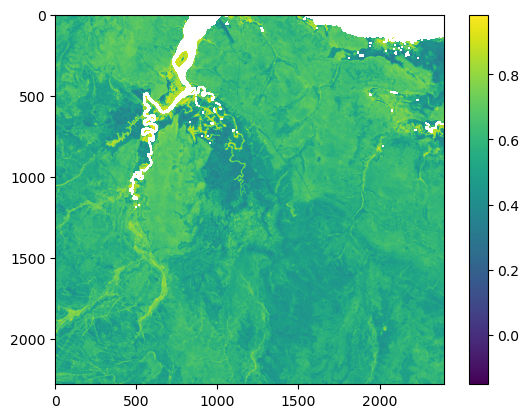

In [6]:
print(ndvi_meta)
print(raster_transform)
print(ndvi_global.shape)

# from the stack of local layers
ndvi_max = 0.8220
ndvi_min = -0.2772

ndvi_global_tens = torch.from_numpy(ndvi_global)

# Normalizing the data
ndvi_global_norm = (ndvi_global_tens - ndvi_min) / (ndvi_max - ndvi_min)

plt.imshow(ndvi_global_norm.numpy())
plt.colorbar()  
plt.show()


### Canopy cover

In [7]:
file_path = '../mapping/cropped rasters/canopy_cover.tif'
# read the raster file
with rasterio.open(file_path) as src:
    # Read the raster band as separate variable
    canopy_global = src.read(1)
    # Get the metadata of the raster
    canopy_meta = src.meta


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 2400, 'height': 2280, 'count': 1, 'crs': CRS.from_epsg(3112), 'transform': Affine(25.0, 0.0, 0.0,
       0.0, -25.0, -1406000.0)}
(2280, 2400)


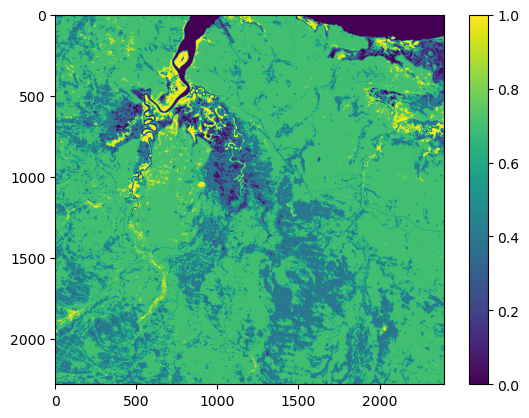

In [8]:
print(canopy_meta)
print(canopy_global.shape)

# from the stack of local layers
canopy_max = 82.5000
canopy_min = 0.0

canopy_global_tens = torch.from_numpy(canopy_global)

# Normalizing the data
canopy_global_norm = (canopy_global_tens - canopy_min) / (canopy_max - canopy_min)

plt.imshow(canopy_global_norm.numpy())
plt.colorbar()  
plt.show()


### Herbaceous vegetation

In [9]:
file_path = '../mapping/cropped rasters/veg_herby.tif'
# read the raster file
with rasterio.open(file_path) as src:
    # Read the raster band as separate variable
    herby_global = src.read(1)
    # Get the metadata of the raster
    herby_meta = src.meta


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 2400, 'height': 2280, 'count': 1, 'crs': CRS.from_epsg(3112), 'transform': Affine(25.0, 0.0, 0.0,
       0.0, -25.0, -1406000.0)}
(2280, 2400)


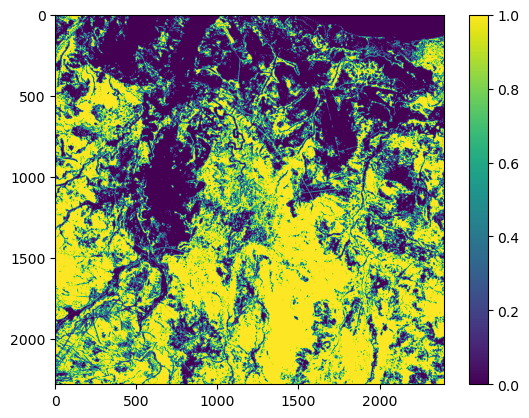

In [10]:
print(herby_meta)
print(herby_global.shape)

# from the stack of local layers
herby_max = 1.0
herby_min = 0.0

herby_global_tens = torch.from_numpy(herby_global)

# Normalizing the data
herby_global_norm = (herby_global_tens - herby_min) / (herby_max - herby_min)

plt.imshow(herby_global_norm.numpy())
plt.colorbar()  
plt.show()


### Slope

In [11]:
file_path = '../mapping/cropped rasters/slope.tif'
# read the raster file
with rasterio.open(file_path) as src:
    # Read the raster band as separate variable
    slope_global = src.read(1)
    # Get the metadata of the raster
    slope_meta = src.meta
    slope_transform = src.transform # same as the raster transform in the NDVI raster read

print(slope_global)
print(slope_transform)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan 0.3352837  0.39781624 ... 0.         0.                nan]
 [       nan 0.3983888  0.48142004 ... 0.         0.                nan]
 ...
 [       nan 2.215875   1.9798415  ... 1.5078747  1.268342          nan]
 [       nan 1.9740707  1.7354656  ... 1.697194   1.4880029         nan]
 [       nan        nan        nan ...        nan        nan        nan]]
| 25.00, 0.00, 0.00|
| 0.00,-25.00,-1406000.00|
| 0.00, 0.00, 1.00|


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 2400, 'height': 2280, 'count': 1, 'crs': CRS.from_epsg(3112), 'transform': Affine(25.0, 0.0, 0.0,
       0.0, -25.0, -1406000.0)}
(2280, 2400)


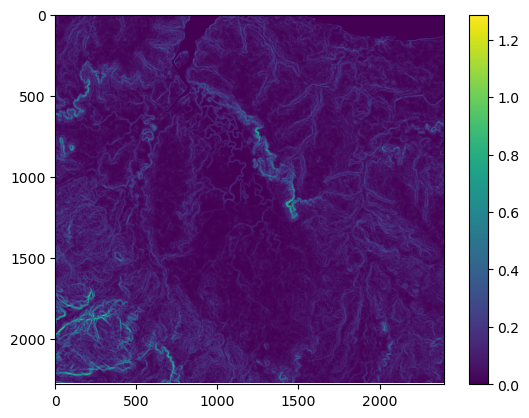

In [12]:
print(slope_meta)
print(slope_global.shape)

# from the stack of local layers
slope_max = 12.2981
slope_min = 0.0006

slope_global_tens = torch.from_numpy(slope_global)

# Normalizing the data
slope_global_norm = (slope_global_tens - slope_min) / (slope_max - slope_min)

plt.imshow(slope_global_norm.numpy())
plt.colorbar()  
plt.show()


Testing functions for selecting subsets of the raster layer, using torch objects

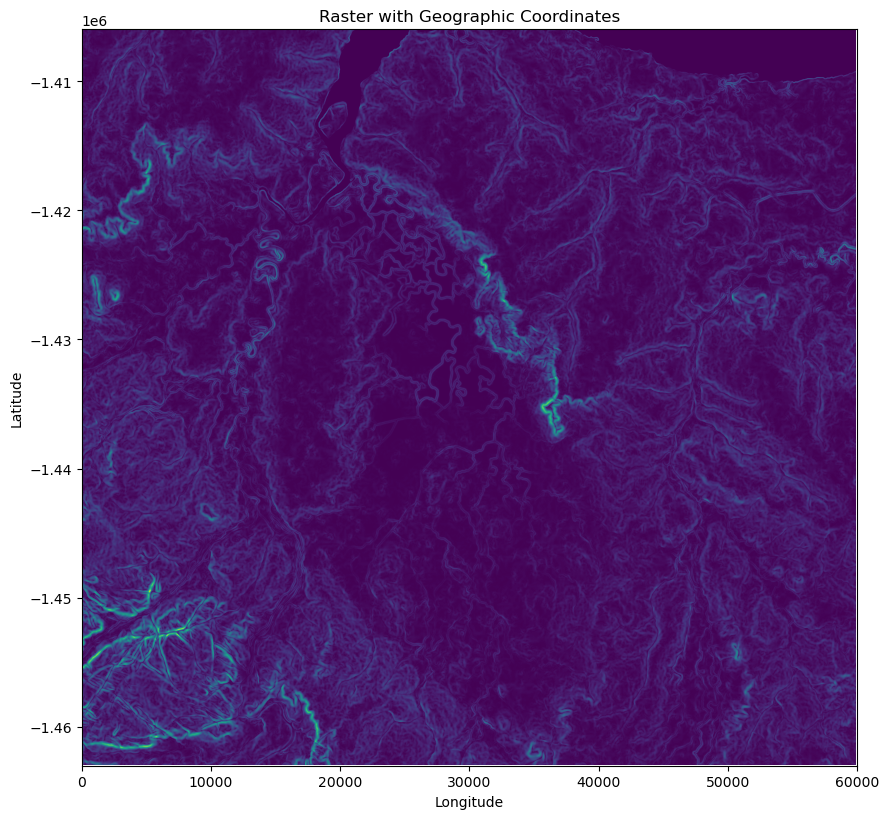

In [13]:
# Create a figure and axis with matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the raster
show(slope_global, transform=raster_transform, ax=ax, cmap='viridis')

# Set the title and labels
ax.set_title('Raster with Geographic Coordinates')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [155]:
x, y = 5.9e4, -1.447e6
print(x, y)

# Convert geographic coordinates to pixel coordinates
px, py = ~raster_transform * (x, y)
# Round pixel coordinates to integers
px, py = int(round(px)), int(round(py))

# Print the pixel coordinates	
print(px, py)

59000.0 -1447000.0
2360 1640


In [156]:
window_size = 101

# Define half the window size
half_window = window_size // 2

# Calculate the window boundaries
row_start = py - half_window
row_stop = py + half_window + 1
col_start = px - half_window
col_stop = px + half_window + 1

# Initialize the subset array with zeros (or any other padding value)
subset = np.zeros((window_size, window_size), dtype=slope_global.dtype)

# Calculate the valid region within the raster bounds
valid_row_start = max(0, row_start)
valid_row_stop = min(slope_global.shape[0], row_stop)
valid_col_start = max(0, col_start)
valid_col_stop = min(slope_global.shape[1], col_stop)

# Calculate the corresponding region in the subset array
subset_row_start = valid_row_start - row_start
subset_row_stop = subset_row_start + (valid_row_stop - valid_row_start)
subset_col_start = valid_col_start - col_start
subset_col_stop = subset_col_start + (valid_col_stop - valid_col_start)

# Copy the valid region from the raster array to the subset array
subset[subset_row_start:subset_row_stop, subset_col_start:subset_col_stop] = \
    slope_global[valid_row_start:valid_row_stop, valid_col_start:valid_col_stop]

Plot the raster layer

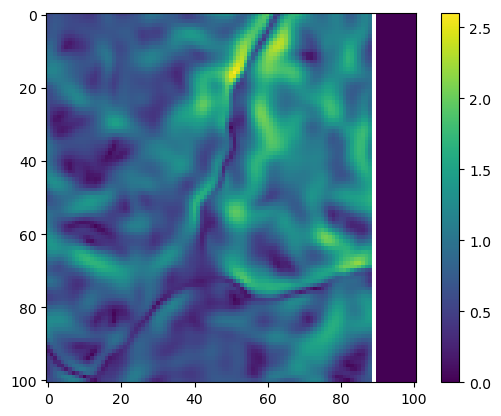

In [157]:
# plot the subset
plt.imshow(subset, cmap='viridis')
plt.colorbar()
plt.show()

## Subset function

In [77]:
def subset_raster_with_padding_torch(raster_tensor, x, y, window_size, transform):
    # Convert geographic coordinates to pixel coordinates
    px, py = ~transform * (x, y)
    
    # Round pixel coordinates to integers
    px, py = int(round(px)), int(round(py))
    
    # Define half the window size
    half_window = window_size // 2
    
    # Calculate the window boundaries
    row_start = py - half_window
    row_stop = py + half_window + 1
    col_start = px - half_window
    col_stop = px + half_window + 1
    
    # Initialize the subset tensor with zeros (or any other padding value)
    subset = torch.zeros((window_size, window_size), dtype=raster_tensor.dtype)
    
    # Calculate the valid region within the raster bounds
    valid_row_start = max(0, row_start)
    valid_row_stop = min(raster_tensor.shape[0], row_stop)
    valid_col_start = max(0, col_start)
    valid_col_stop = min(raster_tensor.shape[1], col_stop)
    
    # Calculate the corresponding region in the subset tensor
    subset_row_start = valid_row_start - row_start
    subset_row_stop = subset_row_start + (valid_row_stop - valid_row_start)
    subset_col_start = valid_col_start - col_start
    subset_col_stop = subset_col_start + (valid_col_stop - valid_col_start)
    
    # Copy the valid region from the raster tensor to the subset tensor
    subset[subset_row_start:subset_row_stop, subset_col_start:subset_col_stop] = \
        raster_tensor[valid_row_start:valid_row_stop, valid_col_start:valid_col_stop]
    
    return subset, col_start, row_start

Testing the subset function

Text(0.5, 1.0, 'Slope Subset')

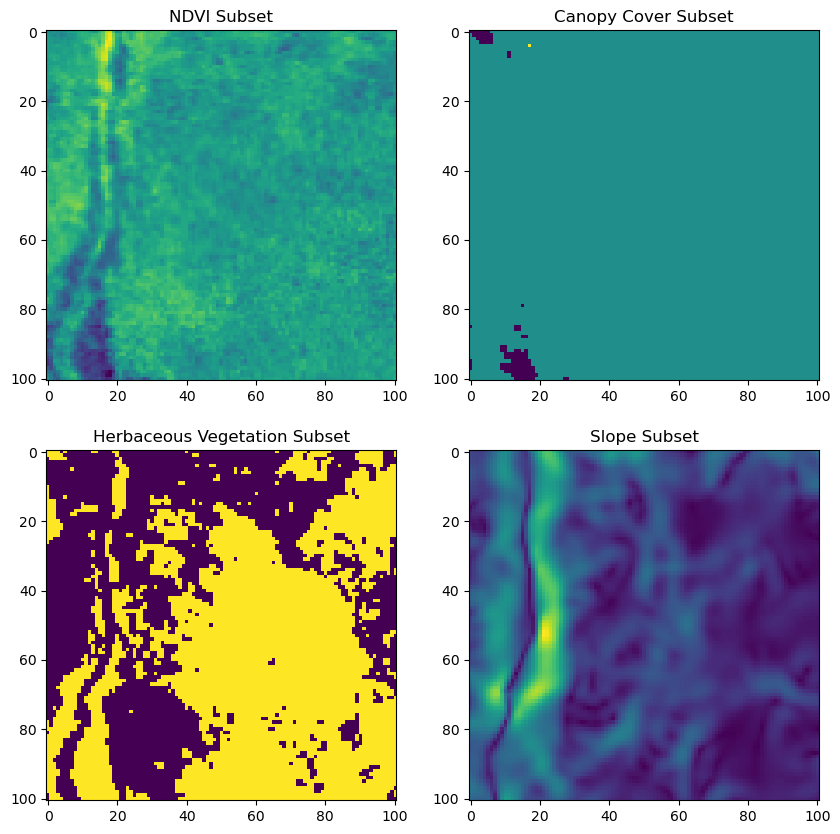

In [244]:
x = 5.8e4
y = -1.435e6
window_size = 101

ndvi_subset, origin_x, origin_y = subset_raster_with_padding_torch(ndvi_global_norm, x, y, window_size, raster_transform)
canopy_subset, origin_x, origin_y = subset_raster_with_padding_torch(canopy_global_norm, x, y, window_size, raster_transform)
herby_subset, origin_x, origin_y = subset_raster_with_padding_torch(herby_global_norm, x, y, window_size, raster_transform)
slope_subset, origin_x, origin_y = subset_raster_with_padding_torch(slope_global_norm, x, y, window_size, raster_transform)

# Plot the subset
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(ndvi_subset.numpy(), cmap='viridis')
axs[0, 0].set_title('NDVI Subset')
# axs[0, 0].axis('off')

axs[0, 1].imshow(canopy_subset.numpy(), cmap='viridis')
axs[0, 1].set_title('Canopy Cover Subset')
# axs[0, 1].axis('off')

axs[1, 0].imshow(herby_subset.numpy(), cmap='viridis')
axs[1, 0].set_title('Herbaceous Vegetation Subset')
# axs[1, 0].axis('off')

axs[1, 1].imshow(slope_subset.numpy(), cmap='viridis')
axs[1, 1].set_title('Slope Subset')
# axs[1, 1].axis('off')



In [245]:
x = 3.7e4
y = -1.435e6
print(x, y)

# Convert geographic coordinates to pixel coordinates
px, py = ~raster_transform * (x, y)
# Round pixel coordinates to integers
px, py = int(round(px)), int(round(py))

# Print the pixel coordinates	
print(px, py)

37000.0 -1435000.0
1480 1160


# Running the model on the subset layers

### Set the device for the model

In [246]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using {device} device")

Using cpu device


# Define the model

In [278]:
class Conv2d_block_toFC(nn.Module):
    def __init__(self, params):
        super(Conv2d_block_toFC, self).__init__()
        self.batch_size = params.batch_size
        self.input_channels = params.input_channels
        self.output_channels = params.output_channels
        self.kernel_size = params.kernel_size
        self.stride = params.stride
        self.kernel_size_mp = params.kernel_size_mp
        self.stride_mp = params.stride_mp
        self.padding = params.padding
        self.image_dim = params.image_dim
        self.device = params.device

        self.conv2d = nn.Sequential(
        nn.Conv2d(in_channels=self.input_channels, out_channels=self.output_channels, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.kernel_size_mp, stride=self.stride_mp),
        nn.Conv2d(in_channels=self.output_channels, out_channels=self.output_channels, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.kernel_size_mp, stride=self.stride_mp),
        nn.Flatten())

    def forward(self, x):
        return self.conv2d(x)
    
class Conv2d_block_spatial(nn.Module):
    def __init__(self, params):
        super(Conv2d_block_spatial, self).__init__()
        self.batch_size = params.batch_size
        self.input_channels = params.input_channels
        self.output_channels = params.output_channels
        self.kernel_size = params.kernel_size
        self.stride = params.stride
        # self.kernel_size_mp = params.kernel_size_mp
        # self.stride_mp = params.stride_mp
        self.padding = params.padding
        self.image_dim = params.image_dim
        self.device = params.device

        self.conv2d = nn.Sequential(
        nn.Conv2d(in_channels=self.input_channels, out_channels=self.output_channels, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding),
        nn.ReLU(),
        nn.Conv2d(in_channels=self.output_channels, out_channels=self.output_channels, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding),
        nn.ReLU(),
        nn.Conv2d(in_channels=self.output_channels, out_channels=1, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding)
        )

    def forward(self, x):

        # print("Shape before squeeze:", self.conv2d(x).shape)
        conv2d_spatial = self.conv2d(x).squeeze(dim = 1)
        # print("Shape before logsumexp:", conv2d_spatial.shape)

        conv2d_spatial = conv2d_spatial - torch.logsumexp(conv2d_spatial, dim = (1, 2), keepdim = True)
        # conv2d_spatial = conv2d_spatial/torch.sum(conv2d_spatial)
        return conv2d_spatial

class FCN_block_all_habitat(nn.Module):
    def __init__(self, params):
        super(FCN_block_all_habitat, self).__init__()
        self.batch_size = params.batch_size
        self.dense_dim_in_all = params.dense_dim_in_all
        self.dense_dim_hidden = params.dense_dim_hidden
        self.dense_dim_out = params.dense_dim_out
        self.image_dim = params.image_dim
        self.device = params.device
        self.dropout = params.dropout

        self.ffn = nn.Sequential(nn.Linear(self.dense_dim_in_all, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.image_dim * self.image_dim)
        )
    
    def forward(self, x):
        return self.ffn(x)


class FCN_block_all_movement(nn.Module):
    def __init__(self, params):
        super(FCN_block_all_movement, self).__init__()
        self.batch_size = params.batch_size
        self.dense_dim_in_all = params.dense_dim_in_all
        self.dense_dim_hidden = params.dense_dim_hidden
        self.dense_dim_out = params.dense_dim_out
        self.image_dim = params.image_dim
        self.device = params.device
        self.num_movement_params = params.num_movement_params
        self.dropout = params.dropout

        self.ffn = nn.Sequential(nn.Linear(self.dense_dim_in_all, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.num_movement_params)
        )
    
    def forward(self, x):
        return self.ffn(x)
    
class FCN_block_nonspatial(nn.Module):
    def __init__(self, params):
        super(FCN_block_nonspatial, self).__init__()
        self.batch_size = params.batch_size
        self.dense_dim_in_nonspatial = params.dense_dim_in_nonspatial
        self.dense_dim_hidden = params.dense_dim_hidden
        self.dense_dim_out = params.dense_dim_out
        self.image_dim = params.image_dim
        self.device = params.device
        self.dropout = params.dropout

        self.ffn = nn.Sequential(nn.Linear(self.dense_dim_in_nonspatial, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.dense_dim_hidden),
            nn.Dropout(self.dropout),
            nn.ReLU(),
            nn.Linear(self.dense_dim_hidden, self.dense_dim_out)
        )
    
    def forward(self, x):
        return self.ffn(x)

class Params_to_Grid_Block(nn.Module):
    def __init__(self, params):
        super(Params_to_Grid_Block, self).__init__()
        self.batch_size = params.batch_size
        self.image_dim = params.image_dim
        self.pixel_size = params.pixel_size
        self.center = self.image_dim // 2
        y, x = np.indices((self.image_dim, self.image_dim))
        self.distance_layer = torch.from_numpy(np.sqrt((self.pixel_size*(x - self.center))**2 + (self.pixel_size*(y - self.center))**2))
        # change the centre cell to the average distance from the centre to the edge of the pixel
        self.distance_layer[self.center, self.center] = 0.56*self.pixel_size # average distance from the centre to the perimeter of the pixel (accounting for longer distances at the corners)
        self.bearing_layer = torch.from_numpy(np.arctan2(y - self.center, x - self.center))
        self.device = params.device

    def gamma_density(self, x, shape, scale):
        return -1*torch.lgamma(shape) -shape*torch.log(scale) + (shape - 1)*torch.log(x) - x/scale
        # return torch.exp(-1*torch.lgamma(shape) -shape*torch.log(scale) + (shape - 1)*torch.log(x) - x/scale)
    
    def vonmises_density(self, x, kappa, loc):
        return kappa*torch.cos(x - loc) - 1*(np.log(2*torch.pi) + torch.log(torch.special.i0(kappa)))
        # return torch.exp(kappa*torch.cos(x - loc) - 1*(np.log(2*torch.pi) + torch.log(torch.special.i0(kappa))))
    
    def forward(self, x):
        gamma_shape = torch.exp(x[:, 0]).unsqueeze(0).unsqueeze(0)
        # gamma_shape = 1.0 + torch.exp(x[:, 0]).unsqueeze(0).unsqueeze(0)
        gamma_shape = gamma_shape.repeat(self.image_dim, self.image_dim, 1)
        gamma_shape = gamma_shape.permute(2, 0, 1)

        gamma_scale = torch.exp(x[:, 1]).unsqueeze(0).unsqueeze(0)
        gamma_scale = gamma_scale.repeat(self.image_dim, self.image_dim, 1)
        gamma_scale = gamma_scale.permute(2, 0, 1)

        vonmises_kappa = torch.exp(x[:, 2]).unsqueeze(0).unsqueeze(0)
        vonmises_kappa = vonmises_kappa.repeat(self.image_dim, self.image_dim, 1)
        vonmises_kappa = vonmises_kappa.permute(2, 0, 1)

        vonmises_loc = x[:, 3].unsqueeze(0).unsqueeze(0)
        vonmises_loc = vonmises_loc.repeat(self.image_dim, self.image_dim, 1)
        vonmises_loc = vonmises_loc.permute(2, 0, 1)

        gamma_density_layer = self.gamma_density(self.distance_layer, gamma_shape, gamma_scale)
        vonmises_density_layer = self.vonmises_density(self.bearing_layer, vonmises_kappa, vonmises_loc)

        # movement_grid = gamma_density_layer*vonmises_density_layer
        # movement_grid = movement_grid/torch.sum(movement_grid)

        movement_grid = gamma_density_layer + vonmises_density_layer # when the Gamma and von Mises densities are on the log-scale
        movement_grid = movement_grid - torch.logsumexp(movement_grid, dim = (1, 2), keepdim = True)

        return movement_grid

class Vector_to_Grid_Block(nn.Module):
    def __init__(self, params):
        super(Vector_to_Grid_Block, self).__init__()
        self.batch_size = params.batch_size
        self.image_dim = params.image_dim
        self.device = params.device
    
    def forward(self, x):
        x_unnorm = x.reshape(x.shape[0], self.image_dim, self.image_dim)
        x_norm = x_unnorm - torch.logsumexp(x_unnorm, dim = (1, 2), keepdim = True)
        return x_norm
    
        # x_norm = x_unnorm/torch.sum(x_unnorm)
        # return x_norm


class ConvJointModel(nn.Module):
    def __init__(self, params):
        super(ConvJointModel, self).__init__()
        # self.conv_habitat = Conv2d_block(params)
        # self.fcn_habitat_all = FCN_block_all_habitat(params)
        # self.fcn_habitat_nonspatial = FCN_block_nonspatial(params)
        # self.habitat_grid_output = Vector_to_Grid_Block(params)

        self.conv_habitat = Conv2d_block_spatial(params)

        self.conv_movement = Conv2d_block_toFC(params)
        self.fcn_movement_all = FCN_block_all_movement(params)
        self.fcn_movement_nonspatial = FCN_block_nonspatial(params)
        self.movement_grid_output = Params_to_Grid_Block(params)
        self.device = params.device



    def forward(self, x):
        spatial_data_x = x[0]
        additional_data_x = x[1]

        # conv_habitat = self.conv_habitat(spatial_data_x)
        # covariates_habitat = self.fcn_habitat_nonspatial(additional_data_x)
        # all_predictors_habitat = torch.cat([conv_habitat, covariates_habitat], dim = 1)
        # # print(f"Shape after concatenation: {all_predictors_habitat.shape}")  # Debugging print
        # output_habitat = self.fcn_habitat_all(all_predictors_habitat)
        # output_habitat = self.habitat_grid_output(output_habitat)

        output_habitat = self.conv_habitat(spatial_data_x)
        # print(f"Shape after CNN habitat: {output_habitat.shape}")  # Debugging print

        conv_movement = self.conv_movement(spatial_data_x)
        # print(f"Shape after CNN to FC movement: {conv_movement.shape}")  # Debugging print
        covariates_movement = self.fcn_movement_nonspatial(additional_data_x)
        # print(f"Shape after fcn_movement_nonspatial: {covariates_movement.shape}")  # Debugging print
        all_predictors_movement = torch.cat([conv_movement, covariates_movement], dim = 1)
        # print(f"Shape after torch.cat([conv_movement, covariates_movement], dim = 1): {all_predictors_movement.shape}")  # Debugging print
        output_movement = self.fcn_movement_all(all_predictors_movement)
        # print(f"Shape after fcn_movement_all: {output_movement.shape}")  # Debugging print
        output_movement = self.movement_grid_output(output_movement)
        # print(f"Shape after CNN movement: {output_movement.shape}")  # Debugging print

        output = torch.stack((output_habitat, output_movement), dim = -1)
        return output
    
class ModelParams():
    def __init__(self, dict_params):
        self.batch_size = dict_params["batch_size"]
        self.image_dim = dict_params["image_dim"]
        self.pixel_size = dict_params["pixel_size"]
        self.batch_size = dict_params["batch_size"]
        self.dense_dim_in_nonspatial = dict_params["dense_dim_in_nonspatial"]
        self.dense_dim_hidden = dict_params["dense_dim_hidden"]
        self.dense_dim_out = dict_params["dense_dim_out"]
        self.batch_size = dict_params["batch_size"]
        self.dense_dim_in_all = dict_params["dense_dim_in_all"]
        self.dense_dim_hidden = dict_params["dense_dim_hidden"]
        self.dense_dim_out = dict_params["dense_dim_out"]
        self.batch_size = dict_params["batch_size"]
        self.input_channels = dict_params["input_channels"]
        self.output_channels = dict_params["output_channels"]
        self.kernel_size = dict_params["kernel_size"]
        self.stride = dict_params["stride"]
        self.kernel_size_mp = dict_params["kernel_size_mp"]
        self.stride_mp = dict_params["stride_mp"]
        self.padding = dict_params["padding"]
        self.image_dim = dict_params["image_dim"]
        self.num_movement_params = dict_params["num_movement_params"]
        self.dropout = dict_params["dropout"]
        self.device = dict_params["device"]


## Instantiate the model

In [279]:
params_dict = {"batch_size": 32,
               "image_dim": 101, #number of pixels along the edge of each local patch/image
               "pixel_size": 25, #number of metres along the edge of a pixel
               "dense_dim_in_nonspatial": 2, #change this to however many other scalar predictors you have (bearing, velocity etc)
               "dense_dim_hidden": 128, #number of nodes in the hidden layers
               "dense_dim_out": 128, #number of nodes in the output of the fully connected block (FCN)
               "dense_dim_in_all": 2500 + 128, #number of inputs entering the fully connected block once the nonspatial features have been concatenated to the spatial features
               "input_channels": 4, #number of spatial layers in each image
               "output_channels": 4, #number of filters to learn
               "kernel_size": 3, #the size of the 2D moving windows / kernels that are being learned
               "stride": 1, #the stride used when applying the kernel.  This reduces the dimension of the output if set to greater than 1
               "kernel_size_mp": 2, #the size of the kernel that is used in max pooling operations
               "stride_mp": 2, #the stride that is used in max pooling operations
               "padding": 1, #the amount of padding to apply to images prior to applying the 2D convolution
               "num_movement_params": 4, #number of parameters used to parameterise the movement kernel
               "dropout": 0.1,
               "device": device
               }

params = ModelParams(params_dict)
model = ConvJointModel(params).to(device)
# print(model)

In [281]:
# load the model structure
# model = torch.load('CNN_model_global.pth')
# model.eval()

# # load the model weights
# print(model.state_dict())
model.load_state_dict(torch.load('checkpoint_CNN_global_buffalo.pt'))
print(model.state_dict())

model.eval()

OrderedDict([('conv_habitat.conv2d.0.weight', tensor([[[[-0.0080,  0.1322,  0.1209],
          [ 0.0810,  0.0848,  0.2683],
          [ 0.1356,  0.1685,  0.0847]],

         [[ 0.0348, -0.0309, -0.0468],
          [-0.2214,  0.0487, -0.0261],
          [ 0.0916, -0.1313, -0.1614]],

         [[-0.1274, -0.1357, -0.0396],
          [ 0.0897, -0.0077, -0.4687],
          [ 0.0442, -0.1001,  0.0969]],

         [[-0.1806,  0.0477, -0.0006],
          [-0.0360,  0.0716, -0.1257],
          [-0.1060, -0.0562,  0.0732]]],


        [[[-0.0721,  0.0829, -0.1202],
          [ 0.1429, -0.0422,  0.1644],
          [ 0.0345,  0.1073, -0.0784]],

         [[-0.0224,  0.0657,  0.1173],
          [-0.2454, -0.0110, -0.1035],
          [-0.1806, -0.3209, -0.0148]],

         [[ 0.2142,  0.0752,  0.1207],
          [ 0.0040, -0.1090, -0.0515],
          [-0.2392, -0.2588,  0.2261]],

         [[ 0.1090,  0.2060,  0.1221],
          [-0.1203,  0.0008, -0.1622],
          [-0.0223,  0.0529,  0.0248]]],


ConvJointModel(
  (conv_habitat): Conv2d_block_spatial(
    (conv2d): Sequential(
      (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (conv_movement): Conv2d_block_toFC(
    (conv2d): Sequential(
      (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (fcn_movement_all): FCN_block_all_movement(
    (ffn): Sequential(
      (0): Linear(in_features=2628, out_features=128, bias=True)
      (1): Dropout(p=0.1, inplace=Fal

## Setup simulation parameters

In [282]:
n_steps = 100

Testing the subset function

Text(0.5, 1.0, 'Slope Subset')

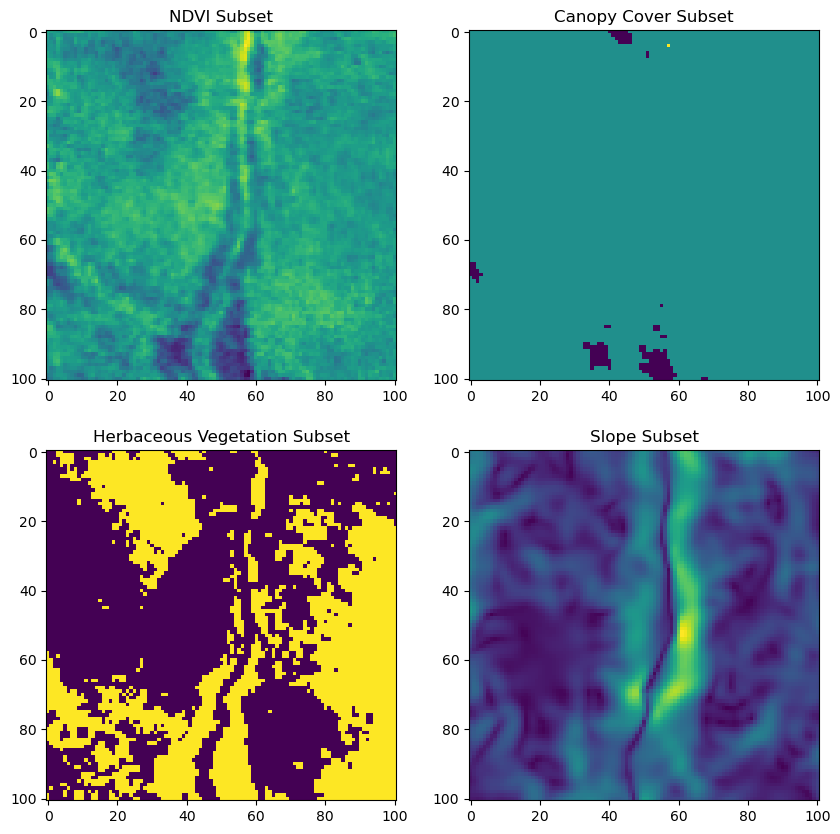

In [283]:
x = 5.7e4
y = -1.435e6
window_size = 101

ndvi_subset, origin_x, origin_y = subset_raster_with_padding_torch(ndvi_global_norm, x, y, window_size, raster_transform)
canopy_subset, origin_x, origin_y = subset_raster_with_padding_torch(canopy_global_norm, x, y, window_size, raster_transform)
herby_subset, origin_x, origin_y = subset_raster_with_padding_torch(herby_global_norm, x, y, window_size, raster_transform)
slope_subset, origin_x, origin_y = subset_raster_with_padding_torch(slope_global_norm, x, y, window_size, raster_transform)

# Plot the subset
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(ndvi_subset.numpy(), cmap='viridis')
axs[0, 0].set_title('NDVI Subset')
# axs[0, 0].axis('off')

axs[0, 1].imshow(canopy_subset.numpy(), cmap='viridis')
axs[0, 1].set_title('Canopy Cover Subset')
# axs[0, 1].axis('off')

axs[1, 0].imshow(herby_subset.numpy(), cmap='viridis')
axs[1, 0].set_title('Herbaceous Vegetation Subset')
# axs[1, 0].axis('off')

axs[1, 1].imshow(slope_subset.numpy(), cmap='viridis')
axs[1, 1].set_title('Slope Subset')
# axs[1, 1].axis('off')



## Stack the subset layers

In [284]:
# Stack the channels along a new axis; here, 1 is commonly used for channel axis in PyTorch
subset_stack = torch.stack([ndvi_subset, canopy_subset, herby_subset, slope_subset], dim=0)
subset_stack
x1 = subset_stack
x1 = x1.unsqueeze(0)
print(x1.shape)
# print(x1)

torch.Size([1, 4, 101, 101])


### Additional data

In [285]:
def repeat_sequence(sequence, length_out):
    return np.resize(sequence, length_out)

hour_t2 = np.resize(range(24), n_steps)
print(hour_t2)

yday_sequence = np.repeat(range(250, 365), 24)
yday_t2 = np.resize(yday_sequence, n_steps)
print(yday_t2)

# Convert lists to PyTorch tensors
hour_t2_tensor = torch.tensor(hour_t2).float()
yday_t2_tensor = torch.tensor(yday_t2).float()

# Stack tensors column-wise to create a tensor of shape [100, 2]
x2_full = torch.stack((hour_t2_tensor, yday_t2_tensor), dim=1)

# print(x2.shape)  # Should output torch.Size([100, 2])
# print(x2)

# x2 = torch.tensor([hour_t2, yday_t2]).float()
# x2 = x2.unsqueeze(0)
print(x2_full.shape)
# print(x2)
print(x2_full[59,:])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  0  1  2  3]
[250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 251 251 251 251 251 251 251 251 251 251 251 251
 251 251 251 251 251 251 251 251 251 251 251 251 252 252 252 252 252 252
 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 254 254 254 254]
torch.Size([100, 2])
tensor([ 11., 252.])


## Run the model on the subsetted layers

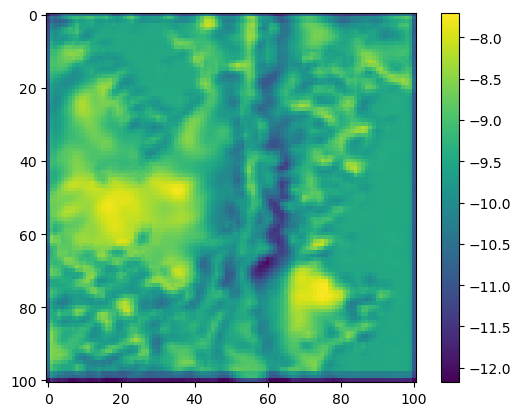

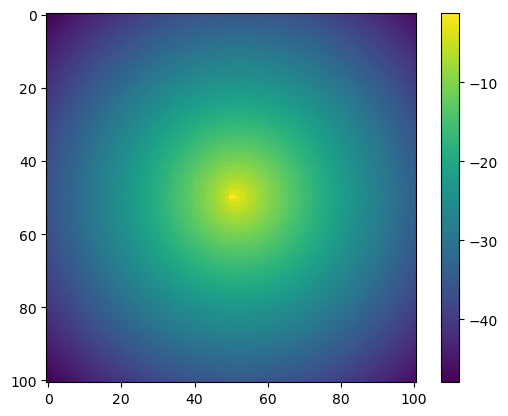

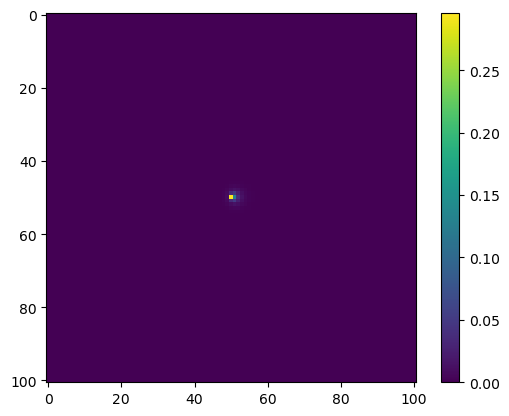

torch.Size([101, 101])


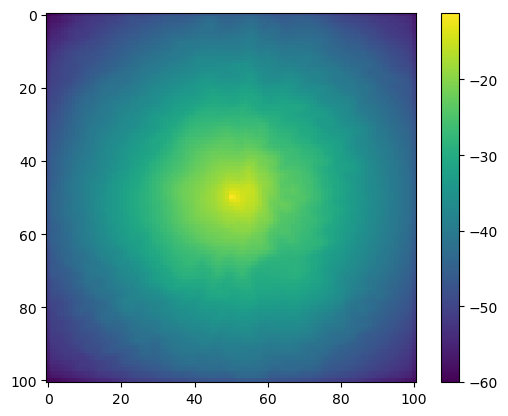

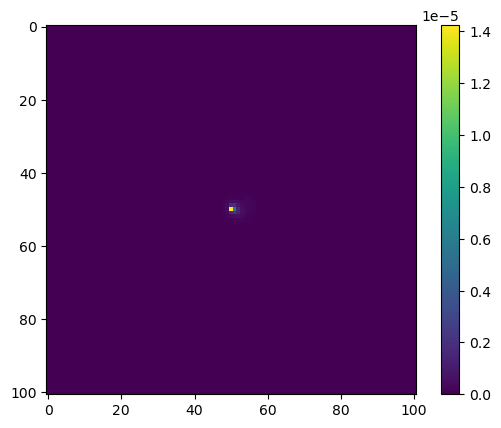

In [287]:
# print(x1.shape)
# print(x2[1,:].unsqueeze(0).shape)

# # print(x1)
# print(x2[1,:].unsqueeze(0).detach().numpy()[0,:])
# # print(x2[53,:], keep)

test = model((x1, x2_full[40,:].unsqueeze(0)))

# test = model((x1, x2[1,:].unsqueeze(0)))
# print(test.shape)
# # print(test)

# with random input
# test_batch = 1
# x1 = (torch.rand(test_batch, 4, 101, 101, device=device)) #spatial data
# x2 = (torch.rand(test_batch, 2, device=device)) #other scalar covariates
# test = model((x1, x2))

# plot the results of the habitat density as an image
plt.imshow(test.detach().numpy()[0,:,:,0])
plt.colorbar()
plt.show()

# plot the results of the movement density as an image
plt.imshow(test.detach().numpy()[0,:,:,1])
plt.colorbar()
plt.show()

# plot the results of the exp movement density as an image
plt.imshow(np.exp(test.detach().numpy()[0,:,:,1]))
plt.colorbar()
plt.show()

test_cat = (test[:, :, :, 0] + test[:, :, :, 1])
# test_cat = torch.log(test[:, :, :, 0]*test[:, :, :, 1])
# test_cat = -1 * test[:, :, :, 0] * torch.exp(test[:, :, :, 1])

test_cat = test_cat.squeeze()

print(test_cat.shape)

plt.imshow(test_cat.detach().numpy()[:,:])
plt.colorbar()
plt.show()

plt.imshow(np.exp(test_cat.detach().numpy()[:,:]))
plt.colorbar()
plt.show()

## Sample from the probability surface

In [296]:
# sample from the array values
test_cat_exp = torch.exp(test_cat)
test_cat_exp = test_cat_exp/torch.sum(test_cat_exp)
# print(test_cat_exp)
print(torch.sum(test_cat_exp))

# Flatten the probability surface
flat_prob_surface = test_cat_exp.flatten().detach().numpy()
print(flat_prob_surface)

# Generate the corresponding indices for the flattened array
indices = np.arange(flat_prob_surface.size)

# Sample from the flattened probability surface
sampled_index = np.random.choice(indices, p=flat_prob_surface)

# Convert the sampled index back to 2D coordinates
sampled_coordinates = np.unravel_index(sampled_index, test_cat_exp.shape)

print("Sampled coordinates:", sampled_coordinates)

tensor(1., dtype=torch.float64, grad_fn=<SumBackward0>)
[1.99671611e-22 5.70350826e-22 8.26512544e-22 ... 3.64605976e-21
 2.52729929e-21 1.12435596e-21]
Sampled coordinates: (51, 52)


## Return sampled point to geographic coordinates

In [297]:
# original locations
print(x ,y)
print(sampled_coordinates)
print(px, py)

# row_start = py - half_window
# row_stop = py + half_window + 1
# col_start = px - half_window
# col_stop = px + half_window + 1

print(row_start, col_start)
new_px = origin_x + sampled_coordinates[0]
new_py = origin_y + sampled_coordinates[1]
print(new_px)
print(new_py)

# Convert geographic coordinates to pixel coordinates
new_x, new_y = raster_transform * (new_px, new_py)
print(new_x, new_y)

57000.0 -1435000.0
(51, 52)
1480 1160
1590 2310
2281
1162
57025.0 -1435050.0


# Full trajectory function

In [423]:
def simulate_trajectory(global_raster_tensors, 
                        additional_data_tensor,
                        window_size, 
                        x_loc, 
                        y_loc,
                        global_raster_transform):
    # Convert geographic coordinates to pixel coordinates
    x = x_loc
    y = y_loc

    # ndvi_subset, origin_x, origin_y = subset_raster_with_padding_torch(ndvi_global_norm, x, y, window_size, global_raster_transform)
    # canopy_subset, origin_x, origin_y = subset_raster_with_padding_torch(canopy_global_norm, x, y, window_size, global_raster_transform)
    # herby_subset, origin_x, origin_y = subset_raster_with_padding_torch(herby_global_norm, x, y, window_size, global_raster_transform)
    # slope_subset, origin_x, origin_y = subset_raster_with_padding_torch(slope_global_norm, x, y, window_size, global_raster_transform)

    # Apply the processing function to each tensor in the list
    # subset_rasters_tensors, origin_x, origin_y = [subset_raster_with_padding_torch(raster_tensor, x=start_x, y=start_y, window_size=101, transform=raster_transform) for raster_tensor in global_raster_tensors]
    # print(subset_rasters_tensors.shape)
    
    results = [subset_raster_with_padding_torch(raster_tensor, x=x_loc, y=y_loc, window_size=window_size, transform=global_raster_transform) for raster_tensor in global_raster_tensors]
    
    # Unpacking the results
    subset_rasters_tensors, origin_xs, origin_ys = zip(*results)
    # print(subset_rasters_tensors.shape)
    
    # Stack the processed tensors along a new dimension (e.g., dimension 0)
    x1 = torch.stack(subset_rasters_tensors, dim=0)
    x1 = x1.unsqueeze(0)
    # print(x1.shape)

    x2 = additional_data_tensor

    test = model((x1, x2))
    # print(test.shape)

    test_cat = (test[:, :, :, 0] + test[:, :, :, 1])
    # test_cat = torch.log(test[:, :, :, 0]*test[:, :, :, 1])
    # test_cat = -1 * test[:, :, :, 0] * torch.exp(test[:, :, :, 1])

    test_cat = test_cat.squeeze()

    # print(test_cat.shape)

    # # normalise the raster for plotting
    # test_cat_norm = test_cat/-torch.sum(test_cat)

    # plt.imshow(test_cat_norm.detach().numpy()[:,:])
    # plt.colorbar()
    # plt.show()
    # plt.draw()  # Ensure the plot is rendered
    # plt.savefig(f"outputs/dl_prob_maps/log_prob_surface_{i}.png", dpi=300)
    # plt.close()  # Close the figure to free memory

    # sample from the array values
    test_cat_exp = torch.exp(test_cat)
    test_cat_exp = test_cat_exp/torch.sum(test_cat_exp)
    # print(test_cat_exp)
    # print(torch.sum(test_cat_exp))

    # plt.imshow(test_cat_exp.detach().numpy()[:,:])
    # plt.colorbar()
    # plt.show()

    # Flatten the probability surface
    flat_prob_surface = test_cat_exp.flatten().detach().numpy()
    # print(flat_prob_surface)

    # Generate the corresponding indices for the flattened array
    indices = np.arange(flat_prob_surface.size)

    # Sample from the flattened probability surface
    sampled_index = np.random.choice(indices, p=flat_prob_surface)

    # Convert the sampled index back to 2D coordinates
    sampled_coordinates = np.unravel_index(sampled_index, test_cat_exp.shape)

    # print("Sampled coordinates:", sampled_coordinates)

    # recover the geographic coordinates of the sampled location
    new_px = origin_xs[0] + sampled_coordinates[0]
    new_py = origin_ys[0] + sampled_coordinates[1]
    # print(new_px, new_py)

    # Convert geographic coordinates to pixel coordinates
    new_x, new_y = raster_transform * (new_px, new_py)

    # Place the sampled location at a random point within the cell (rather than the centre)
    new_x = new_x + np.random.uniform(-12.5, 12.5)
    new_y = new_y + np.random.uniform(-12.5, 12.5)

    # print(new_x, new_y)

    return new_x, new_y, test_cat


## Call the function

In [424]:
global_raster_list = [ndvi_global_norm, canopy_global_norm, herby_global_norm, slope_global_norm]
x2 = x2_full[3,:].unsqueeze(0)
print(x2)

simulate_trajectory(global_raster_tensors=global_raster_list,
                    additional_data_tensor=x2,
                    window_size=101,
                    x_loc=5.8e4,
                    y_loc=-1.4325e6,
                    global_raster_transform=raster_transform)

tensor([[3., 3.]])


(58050.45541577461,
 -1432497.3510477673,
 tensor([[-37.5546, -36.4760, -36.6451,  ..., -35.8341, -35.9384, -36.7126],
         [-36.7402, -35.3200, -35.5791,  ..., -34.4540, -34.5660, -35.8502],
         [-36.9716, -35.6606, -35.7788,  ..., -34.1631, -34.3577, -35.6519],
         ...,
         [-35.9697, -34.2122, -34.3786,  ..., -35.2513, -35.2855, -36.1419],
         [-36.1842, -34.4581, -34.5418,  ..., -35.2101, -35.2425, -36.3204],
         [-37.5762, -36.5713, -36.5304,  ..., -36.5866, -36.6486, -37.2346]],
        dtype=torch.float64, grad_fn=<SqueezeBackward0>))

# Generate trajectory

## Setup parameters

In [425]:
# Setup the simulation parameters
n_steps = 100
starting_yday = 3
start_x = 3.0e4
start_y = -1.4325e6
global_raster_list = [ndvi_global_norm, canopy_global_norm, herby_global_norm, slope_global_norm]
window_size = 101
global_raster_transform = raster_transform


## Create simulation inputs from the parameters

In [426]:
x = np.repeat(0., n_steps)
y = np.repeat(0., n_steps)
# print(x)

x[0], y[0] = start_x, start_y
# print(x, y)

# Create sequence of steps
step = range(1, n_steps)
# print(step)

# Create sequence of hours
hour_t2 = np.resize(range(24), n_steps)
# print(hour_t2)

# Create sequence of days of the year
yday_sequence = np.repeat(range(1, 365), 24)
yday_t2 = yday_sequence[yday_sequence > starting_yday - 1]
yday_t2 = np.resize(yday_t2, n_steps)
# print(yday_t2)

# Convert lists to PyTorch tensors
hour_t2_tensor = torch.tensor(hour_t2).float()
yday_t2_tensor = torch.tensor(yday_t2).float()

# Stack tensors column-wise to create a tensor of shape [100, 2]
x2_full = torch.stack((hour_t2_tensor, yday_t2_tensor), dim=1)
# print(x2.shape)

# List to hold filenames of saved images
filenames = []

## Trajectory loop

In [427]:
for i in range(1, n_steps):

    x_loc = x[i-1]
    y_loc = y[i-1]
    x2 = x2_full[i,:].unsqueeze(dim=0)
    
    new_x, new_y, log_prob_surface = simulate_trajectory(global_raster_tensors=global_raster_list,
                                       additional_data_tensor=x2,
                                       window_size=101,
                                       x_loc=x_loc,
                                       y_loc=y_loc,
                                       global_raster_transform=global_raster_transform)
    
    print(new_x, new_y)

    # normalise the raster for plotting
    log_prob_surface_norm = log_prob_surface/-torch.sum(log_prob_surface)
    # convert to numpy array
    log_prob_surface_norm = log_prob_surface_norm.detach().numpy()[:,:]

    # Save the figure
    filename = f"outputs/dl_prob_maps/log_prob_surface_{i}.png"

    plt.figure()  # Create a new figure
    plt.imshow(log_prob_surface_norm)
    plt.colorbar()
    plt.draw()  # Ensure the plot is rendered
    plt.savefig(filename, dpi=300)
    # plt.show()
    plt.close()  # Close the figure to free memory

    # Add filename to the list
    filenames.append(filename)  
    

    # # Detach the tensor from the computation graph and convert it to a numpy array
    # log_prob_surface_np = log_prob_surface.detach().numpy()
    # # Normalize the data to the range [0, 255] for image conversion
    # log_prob_surface_np = 255 * (log_prob_surface_np - np.min(log_prob_surface_np)) / (np.max(log_prob_surface_np) - np.min(log_prob_surface_np))
    # log_prob_surface_np = log_prob_surface_np.astype(np.uint8)
    # # Create an image from the numpy array
    # im = Image.fromarray(log_prob_surface_np, mode='L')  # Use 'L' mode for grayscale image
    # # im = Image.fromarray(log_prob_surface.detach().numpy())
    # im.save(f"outputs/dl_prob_maps/log_prob_surface_{i}.png")

    x[i] = new_x
    y[i] = new_y



29923.180316818238 -1432840.4802883856
30051.033367776847 -1432846.9532793567
30590.11739978104 -1433422.4545357507
30849.93183058068 -1433434.3505153195
30895.76528842858 -1433437.4659251187
30903.393702937792 -1433423.349906708
30832.54346609759 -1433412.7210089935
30818.05004724464 -1433545.8831073313
30820.368979729297 -1433682.449106082
30874.308194240715 -1433749.7411728045
31063.85565354163 -1433768.1089846434
31495.373693425187 -1433789.3045296664
31808.127662437735 -1433910.9281795444
31811.092085489225 -1433887.968359225
31855.59947194951 -1433934.6968081004
31970.49679318787 -1433937.1701058906
31796.624869661922 -1434517.733205073
32031.50058584865 -1435246.183222105
31946.73455973391 -1435355.0296882333
31950.16520679295 -1435556.70142164
31877.48563260986 -1435610.3532677065
31795.50477142724 -1435204.423579267
31833.121537427207 -1435215.9941583134
31740.042993806615 -1435321.2325669248
31619.10772323665 -1435302.0150706738
31640.686491408356 -1435188.178904608
31164.501

## Create gif from images

In [432]:
# Create a GIF from the saved images
with imageio.get_writer('outputs/gifs/log_prob_surface.gif', mode='I', loop=0, fps = 5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

## Check the output trajectory

In [433]:
print(x, y)

[30000.         29923.18031682 30051.03336778 30590.11739978
 30849.93183058 30895.76528843 30903.39370294 30832.5434661
 30818.05004724 30820.36897973 30874.30819424 31063.85565354
 31495.37369343 31808.12766244 31811.09208549 31855.59947195
 31970.49679319 31796.62486966 32031.50058585 31946.73455973
 31950.16520679 31877.48563261 31795.50477143 31833.12153743
 31740.04299381 31619.10772324 31640.68649141 31164.50112338
 31157.58455042 31196.04582006 31249.66635455 31203.68943084
 31123.61056471 31170.06092278 31171.16593837 31129.64983906
 31095.58698886 31136.07258586 31311.85381824 31269.90185234
 31277.12395306 31188.71771919 31191.11979581 31199.45577862
 31276.61237044 31463.4697177  31493.337931   31490.73289076
 31609.48054708 31379.9360345  31144.28229905 31069.02337688
 31064.79459004 30968.79051872 30717.69884167 30687.38221732
 30644.5887051  30703.4034516  30457.97241628 30430.82995637
 30383.05529815 30354.27138506 30281.71599151 30285.9025029
 30320.6852972  30419.3034